In [2]:
# Import the necessary libraries

import numpy as np 
import pandas as pd 

In [3]:
# Read the spam.csv file into a Pandas DataFrame

df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop unnecessary columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
# Display a sample of the data

df.sample(5)

,v1,v2
1933,ham,R u over scratching it?
982,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
1420,ham,No. She's currently in scotland for that.
1024,ham,Hasn't that been the pattern recently crap wee...
2294,spam,You have 1 new message. Please call 08718738034.


In [8]:
# Rename the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
# Convert the target column to numerics

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
# Transform and Encode Target Column

df['target'] = encoder.fit_transform(df['target'])

In [ ]:
# The code above uses a LabelEncoder to transform and encode the 'target' column in the DataFrame 'df'.
# The LabelEncoder is a preprocessing technique that converts categorical labels into numerical values.
# This is particularly useful when working with machine learning algorithms that require numerical input.
# The LabelEncoder's 'fit_transform' method computes the mapping of unique labels in the 'target' column to integers,
# assigning a unique numerical value to each unique label. The original 'target' column is replaced with the
# transformed numerical values.

In [11]:
df.head

<bound method NDFrame.head of       target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [12]:
# Check for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Check for duplicate rows

df.duplicated().sum()

403

In [14]:
# Drop duplicate rows

df = df.drop_duplicates(keep='first')

In [15]:
# Check for duplicate rows again

df.duplicated().sum()

0

## 2. EDA
# Exploratory Data Analysis 

In [16]:
# Display the first few rows of the data

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Count the number of spam and ham messages
#"ham," refer to legitimate, non-spam messages that are relevant and desired by the recipient.

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2647ac2de90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

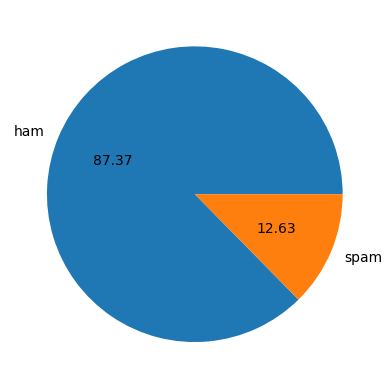

In [18]:
# Plot the number of spam and ham messages as a pie chart

import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [19]:
# The data is imbalanced, so we will need to oversample the minority class (spam)

In [20]:
import nltk

In [21]:
#nltk.download('punkt') 

In [22]:
# Add a new column to the DataFrame containing the number of characters in each text entry.
# This code calculates the length (number of characters) of each text in the 'text' column and adds it as a new column 'num_characters'.

df['num_characters'] = df['text'].apply(len)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of  words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\4052003669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# This code uses the describe() method to calculate descriptive statistics
#  for the columns num_characters, num_words, and num_sentences in the DataFrame df
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham
# This code first selects the rows in the DataFrame df where the target column is equal to 0,
#  which means the message is ham. Then, it selects the columns num_characters, num_words, and num_sentences. Finally,
#  it calls the describe() method on the resulting DataFrame to get descriptive statistics for each of the columns.
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

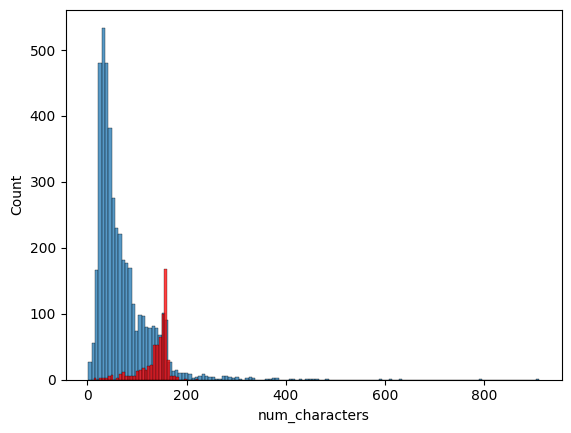

In [32]:
#This code uses the histplot() function from the seaborn library to plot histograms of the number of characters
#  in the text messages for the ham (target = 0) and spam (target = 1) classes.
#  The color argument is used to set the color of the histogram for the spam class to red.
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

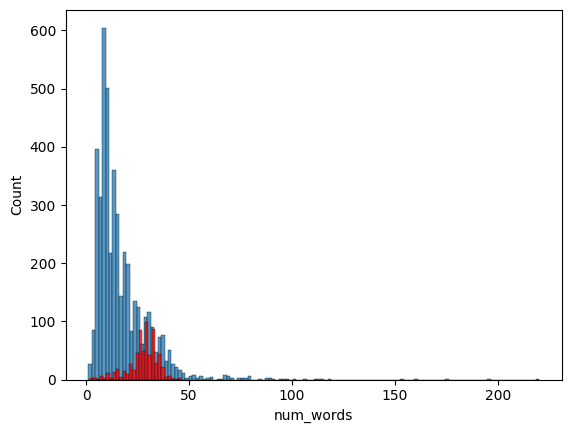

In [33]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


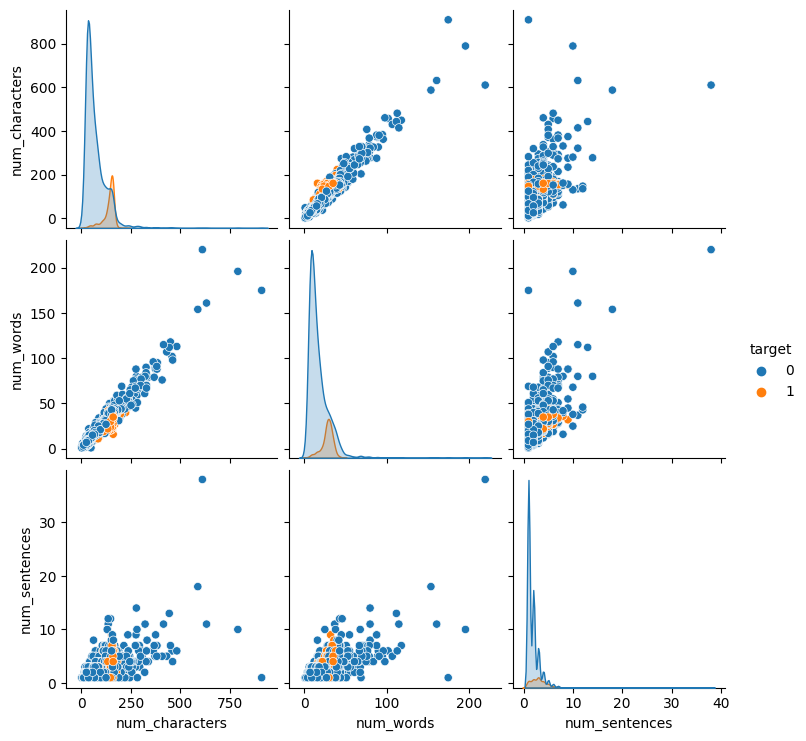

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

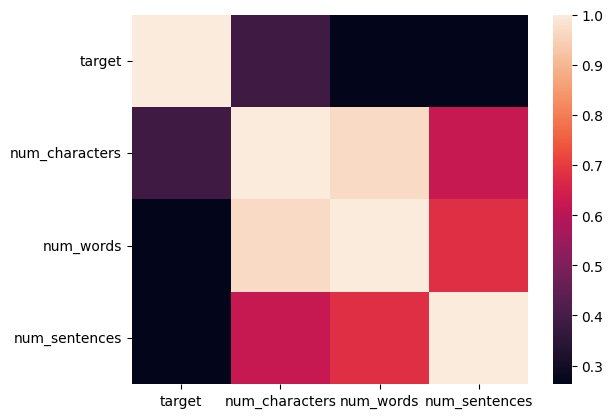

In [35]:
# This code creates a heatmap of the correlation matrix of the Pandas DataFrame df.
# The numeric_only parameter is set to True to only show the correlation between numeric columns.
sns.heatmap(df.corr(numeric_only=True))

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [36]:
# Function to transform text

def transform_text(text):

    """
    Preprocesses and transforms the input text.
    
    Steps:
    1. Convert text to lowercase.
    2. Tokenize text into words.
    3. Remove non-alphanumeric tokens.
    4. Remove stopwords and punctuation.
    5. Apply stemming to remaining tokens.
    
    Args:
        text (str): Input text to be transformed.
        
    Returns:
        str: Transformed text.
    """
    
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [42]:
# Download stopwords (if not already downloaded)
#nltk.download('stopwords')

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.corpus import stopwords

In [46]:
# Initialize stemmer

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7340\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [49]:
# Creating a WordCloud for spam messages
# we are creating a word cloud with a width of 500 pixels, a height of 500 pixels, 
# a minimum font size of 10, and a white background.

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [50]:
# The output of the code is a WordCloud object, which can be used to visualize the most common words in the text.
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

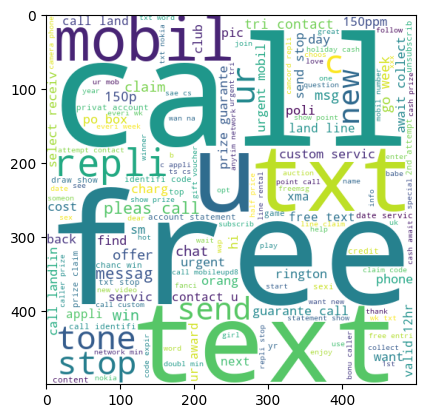

In [51]:
plt.imshow(spam_wc)

In [52]:
# Creating a WordCloud for ham messages

ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

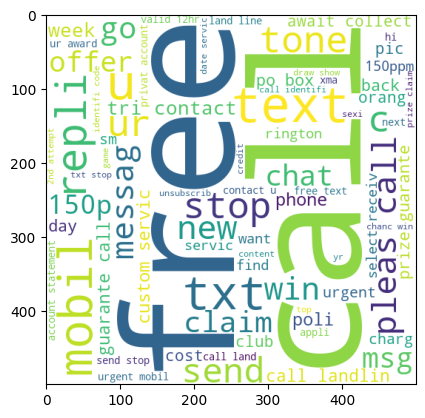

In [53]:
plt.imshow(ham_wc)

In [54]:
# Display the first few rows of the DataFrame

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
# Creating a corpus of words from spam messages

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
# Calculate the length of the spam corpus

len(spam_corpus)

9939

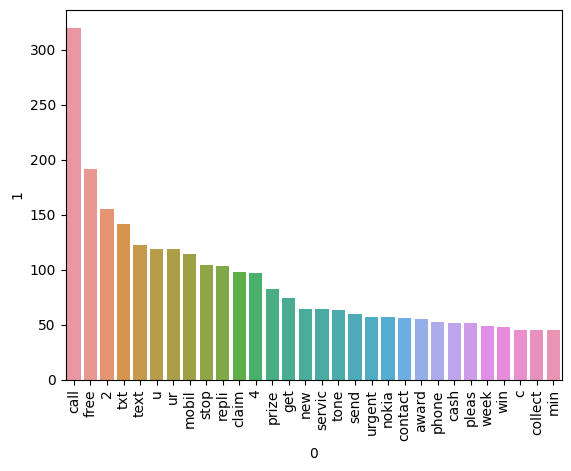

In [60]:
# Create a bar plot of the most common words in the spam corpus

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


## 4. Model Building

In [91]:
# Initialize a TFIDF Vectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [92]:
# Transform text data into TF-IDF features

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [93]:
X.shape

(5169, 3000)

In [94]:
# Extract target labels

y = df['target'].values

In [95]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Split data into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [98]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [99]:
# Initialize Naive Bayes classifiers

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
# Train Gaussian Naive Bayes classifier

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [101]:
# Train Multinomial Naive Bayes classifier

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [102]:
# Train Bernoulli Naive Bayes classifier

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [103]:
# tfidf -> mnb
# 
# Selecting the TFIDF vectorizer and Multinomial Naive Bayes for it's high precision.

In [104]:
import pickle
# Save TFIDF Vectorizer and Naive Bayes Model to Files

# Pickle is a Python module used to serialize (pickle) and deserialize (unpickle) Python objects.
# We are using it here to save the trained TFIDF vectorizer and Naive Bayes model to files.

# Save the trained TFIDF vectorizer to a file named 'vectorizer.pkl'
# 'wb' mode is used for writing the binary data of the pickled object
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

# Save the trained Multinomial Naive Bayes classifier to a file named 'model.pkl'
# 'wb' mode is used for writing the binary data of the pickled object
pickle.dump(mnb,open('model.pkl','wb'))